# Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data and Prepare

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Transformation', 'R-squared', 'Intercept', 'Coefficient'])

Text(0, 0.5, 'Salary')

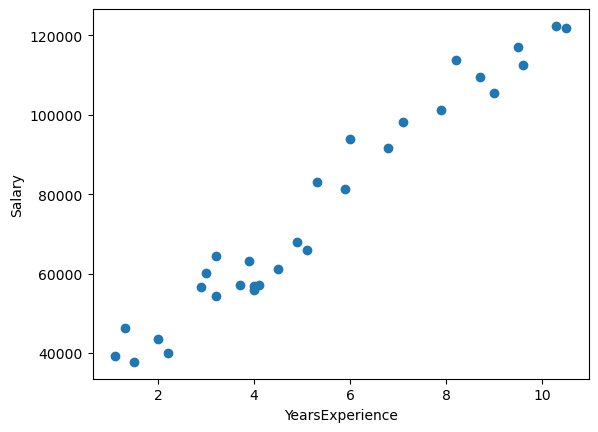

In [5]:
# check whether there is a linear pattren between X and y
plt.scatter(df.YearsExperience,df.Salary)
plt.xlabel('YearsExperience')
plt.ylabel("Salary")

# Fitting a SLR Model with Different Transformations

In [6]:
# Original data
X = df['YearsExperience']

model = smf.ols( 'Salary~YearsExperience', data = df)
model_result = model.fit()

results.loc[0] = ['Original', model_result.rsquared, model_result.params[0], model_result.params[1]]

/var/folders/d7/624qzhlx7051pksqzldlx5fh0000gn/T/ipykernel_36294/954321714.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.loc[0] = ['Original', model_result.rsquared, model_result.params[0], model_result.params[1]]


In [7]:
# Standard Scaling
df1 = df.copy()
df1['X_scaled'] = (X - X.mean()) / X.std()

model_st = smf.ols( 'Salary~X_scaled', data = df1)
model_st_result = model_st.fit()

results.loc[1] = ['Standard Scaling', model_st_result.rsquared, model_st_result.params[0], model_st_result.params[1]]

/var/folders/d7/624qzhlx7051pksqzldlx5fh0000gn/T/ipykernel_36294/2562298051.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.loc[1] = ['Standard Scaling', model_st_result.rsquared, model_st_result.params[0], model_st_result.params[1]]


In [8]:
# Log Transformation
df2=df.copy()
df2['X_log'] = np.log(X)

model_log = smf.ols( 'Salary~X_log', data = df2)
model_log_result = model.fit()

results.loc[2] = ['Log Transformation', model_log_result.rsquared, model_log_result.params[0], model_log_result.params[1]]

/var/folders/d7/624qzhlx7051pksqzldlx5fh0000gn/T/ipykernel_36294/179935853.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.loc[2] = ['Log Transformation', model_log_result.rsquared, model_log_result.params[0], model_log_result.params[1]]


In [9]:
# Square Root Transformation
df3=df.copy()
df3['X_sqrt'] = np.sqrt(X)

model_sqrt = smf.ols( 'Salary~X_sqrt', data = df3)
model_sqrt_result = model.fit()

results.loc[3] = ['Square Root Transformation', model_sqrt_result.rsquared, model_sqrt_result.params[0], model_sqrt_result.params[1]]

/var/folders/d7/624qzhlx7051pksqzldlx5fh0000gn/T/ipykernel_36294/752097958.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.loc[3] = ['Square Root Transformation', model_sqrt_result.rsquared, model_sqrt_result.params[0], model_sqrt_result.params[1]]


In [10]:
# Reciprocal Transformation
df4=df.copy()
df4['X_reciprocal'] = 1 / X

model_reciprocal = smf.ols( 'Salary~X_reciprocal', data = df4)
model_reciprocal_result = model.fit()

results.loc[4] = ['Reciprocal Transformation', model_reciprocal_result.rsquared, model_reciprocal_result.params[0], model_reciprocal_result.params[1]]

/var/folders/d7/624qzhlx7051pksqzldlx5fh0000gn/T/ipykernel_36294/630770758.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.loc[4] = ['Reciprocal Transformation', model_reciprocal_result.rsquared, model_reciprocal_result.params[0], model_reciprocal_result.params[1]]


# Results

In [56]:
results

,Transformation,R-squared,Intercept,Coefficient
0,Original,0.956957,25792.200199,9449.962321
1,Standard Scaling,0.956957,76003.000000,26817.936162
2,Log Transformation,0.956957,25792.200199,9449.962321
3,Square Root Transformation,0.956957,25792.200199,9449.962321
4,Reciprocal Transformation,0.956957,25792.200199,9449.962321


# Simple Linear Regression using Sklearn

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
X=df[['YearsExperience']]
y=df[['Salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
# Initialize and fit the model on the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Predict on the testing data 
y_pred = lr_model.predict(X_test)

In [54]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 12823412.298126506


In [55]:
print('Coefficients:', lr_model.coef_)
print('Intercept:', lr_model.intercept_)
print('R-squared Score:', r2_score(y_test, y_pred))

Coefficients: [[9312.57512673]]
Intercept: [26780.09915063]
R-squared Score: 0.988169515729126


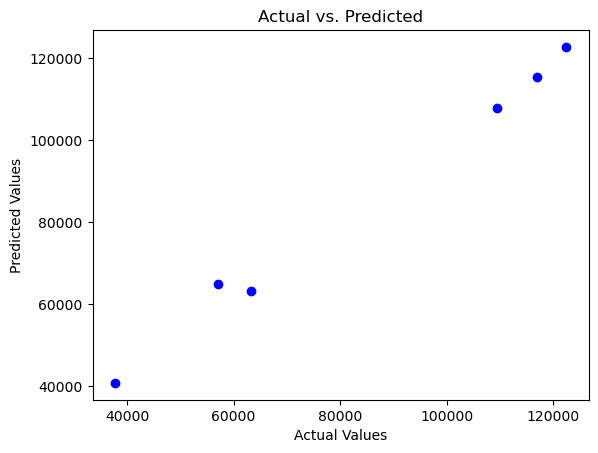

In [48]:
# Plot actual vs. predicted
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()